<Axes: xlabel='timestamp'>

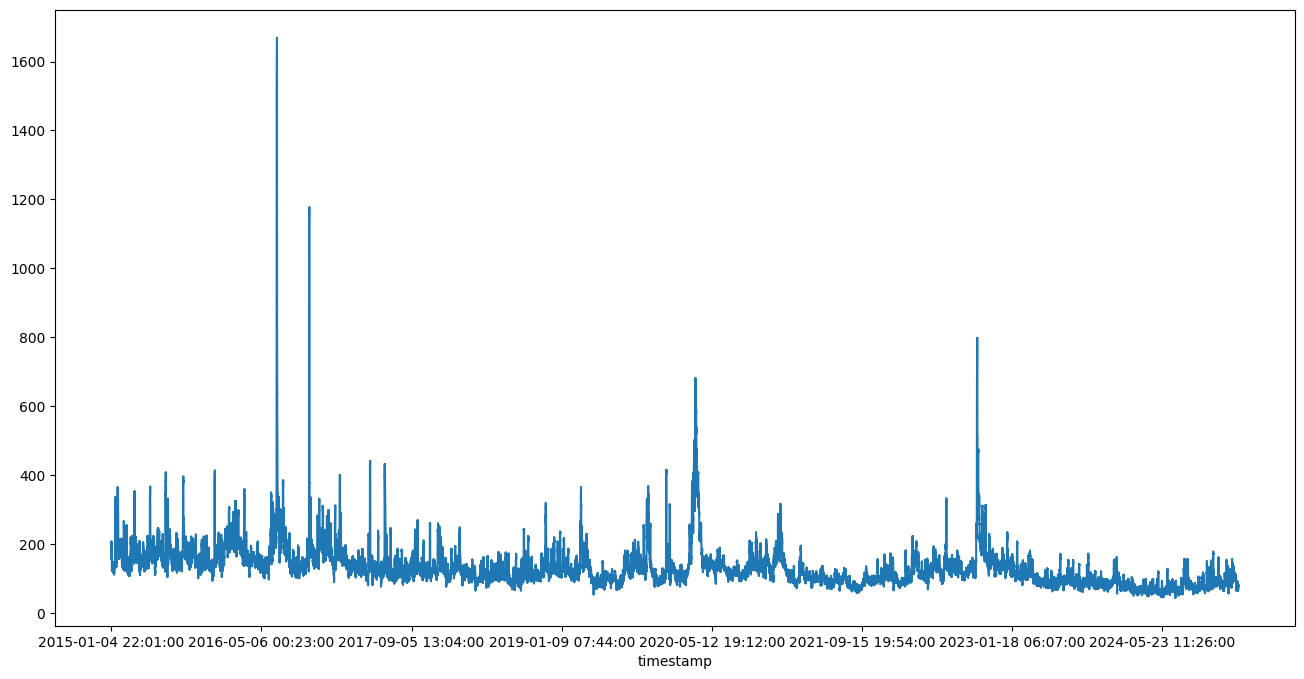

In [3]:
import cudf as cf
import matplotlib.pyplot as plt

eurgbp = cf.read_csv('/home/edoardocame/Desktop/python_dir/data/eurgbp-m1-bid-2015-01-01-2025-01-30T14:40.csv', index_col=0) 

eurgbp['returns'] = eurgbp['close'].pct_change() * 1000000
eurgbp['rolling_sd'] = eurgbp['returns'].rolling(window=1440).std()
eurgbp.dropna(inplace=True)
rolling_sd = eurgbp['rolling_sd'].to_pandas()
rolling_sd.plot(figsize=(16, 8))

In [11]:
eurgbp_before_2023 = eurgbp[eurgbp.index < '2023-01-01']
eurgbp_after_2023 = eurgbp[eurgbp.index >= '2023-01-01']
print(f"Standard Dev of volatility before 2023 is: {eurgbp_before_2023['rolling_sd'].std()}, \nStandard Dev of volatility after 2023 is: {eurgbp_after_2023['rolling_sd'].std()}")

Standard Dev of volatility before 2023 is: 68.91075551367531, 
Standard Dev of volatility after 2023 is: 24.576186559241282


Qui ho appena dimostrato che la volatilità dei ritorni prima del 2023 era 2.83x volte tanto rispetto a quella dopo il 2023. Questo sicuramente influenza la performance della strategia.

Text(0.5, 1.0, 'EUR/GBP Closing Prices')

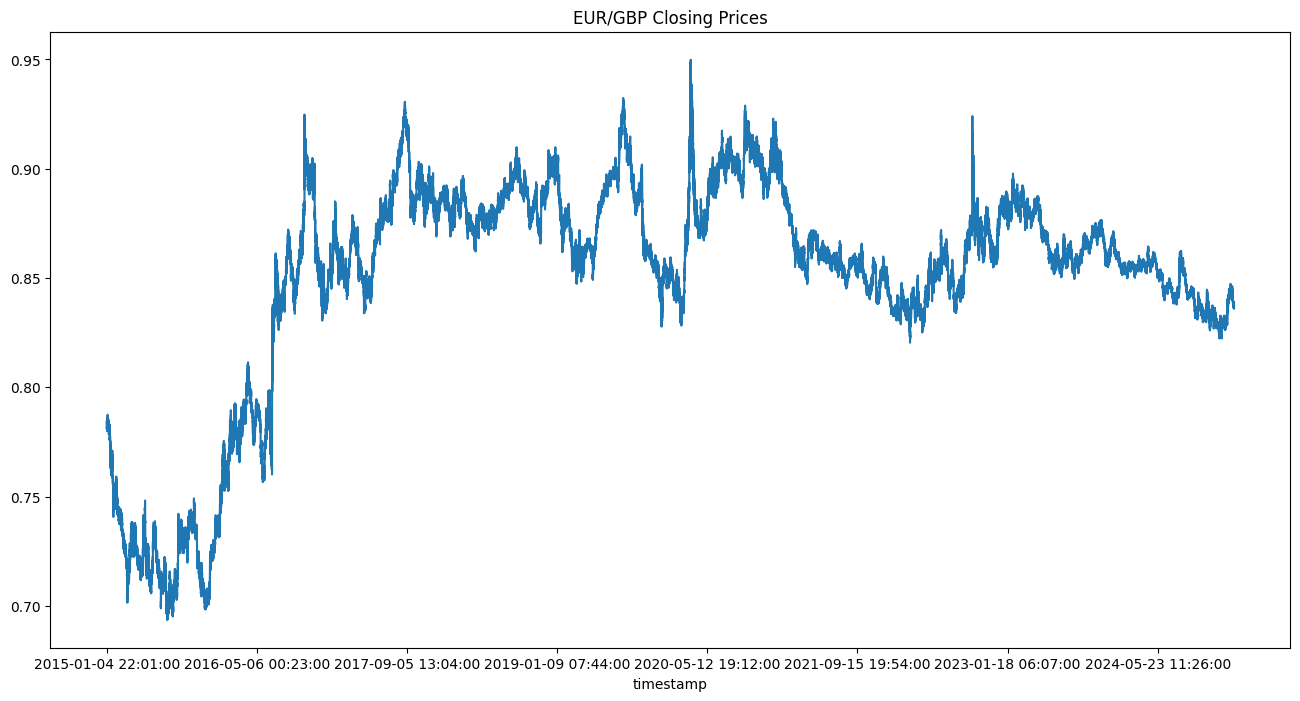

In [14]:
close = eurgbp['close'].to_pandas() 
close.plot(figsize=(16, 8))
plt.title('EUR/GBP Closing Prices')